In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [145]:
df = pd.read_csv('HomeDataset_after_preprocess_04_06.csv')

In [146]:
df.head()

,num_floor,unit_per_floor,price,age,statuse,view,doc_status,north,sought,west,...,kitch,service,floor_covering,open,parking,warehouse,balcony,equipment,address_encoded,room_to_area
0,4.0,1,1.183908e+08,27.0,8,22.0,10.0,0.0,1.0,0.0,...,50.0,15.0,15.0,1.0,1.0,1.0,1.0,6,1.212189e+08,0.022989
1,5.0,2,1.400000e+08,0.0,8,22.0,10.0,1.0,0.0,0.0,...,50.0,15.0,10.0,1.0,1.0,1.0,1.0,20,1.060243e+08,0.023810
2,5.0,1,1.363636e+08,0.0,8,22.0,10.0,0.0,1.0,0.0,...,50.0,15.0,10.0,1.0,1.0,1.0,1.0,21,1.168818e+08,0.030303
3,4.0,1,5.250000e+07,18.0,8,22.0,3.0,0.0,1.0,0.0,...,50.0,5.0,10.0,1.0,0.0,0.0,1.0,3,9.027674e+07,0.037500
4,4.0,4,1.400000e+08,3.0,8,22.0,10.0,1.0,0.0,0.0,...,50.0,15.0,10.0,1.0,1.0,0.0,1.0,18,1.381376e+08,0.015385


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   num_floor        951 non-null    float64
 1   unit_per_floor   951 non-null    int64  
 2   price            951 non-null    float64
 3   age              951 non-null    float64
 4   statuse          951 non-null    int64  
 5   view             949 non-null    float64
 6   doc_status       949 non-null    float64
 7   north            951 non-null    float64
 8   sought           951 non-null    float64
 9   west             951 non-null    float64
 10  east             951 non-null    float64
 11  floor            951 non-null    float64
 12  area             951 non-null    float64
 13  num_sleep        951 non-null    float64
 14  tel              939 non-null    float64
 15  kitch            950 non-null    float64
 16  service          951 non-null    float64
 17  floor_covering  

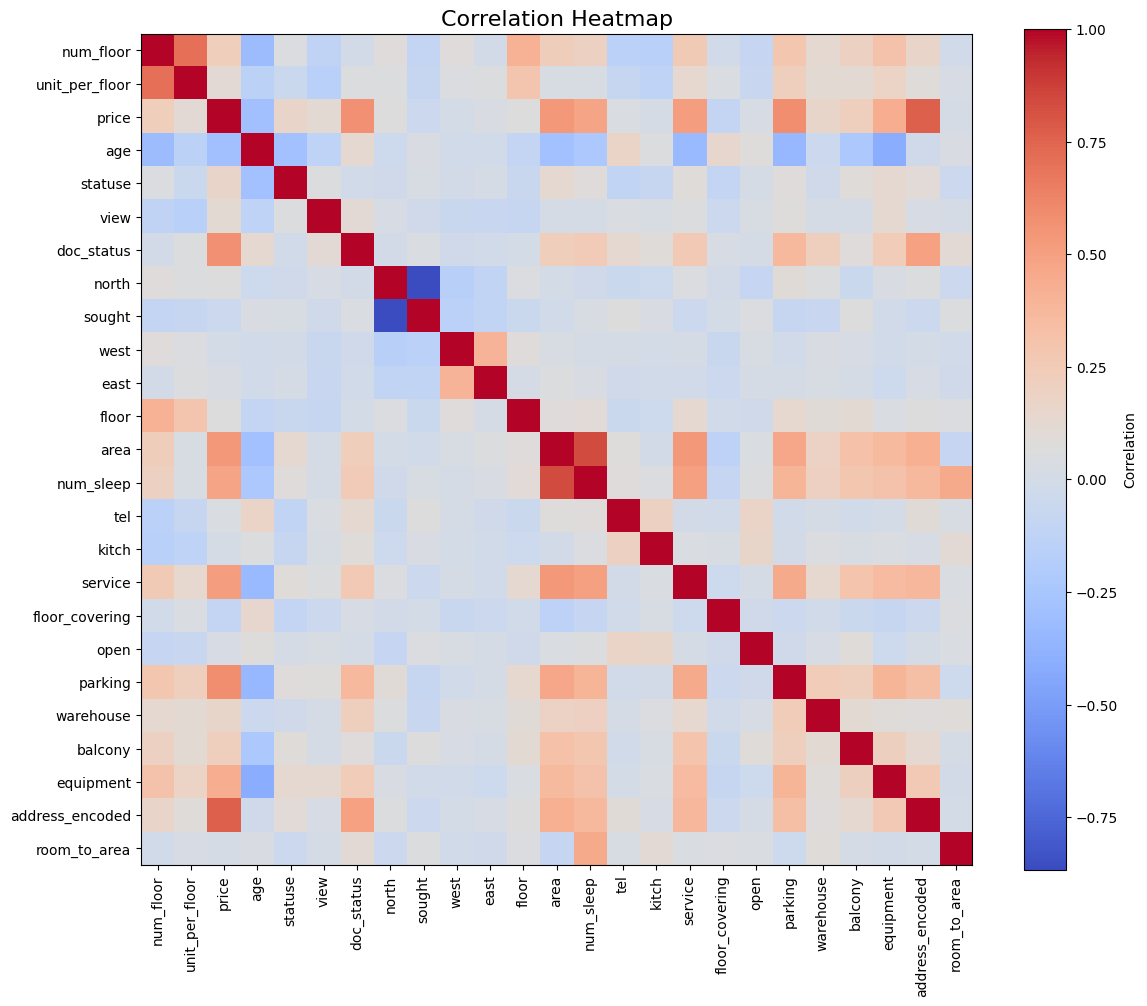

In [148]:
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)

plt.figure(figsize=(12,10))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Correlation")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()


In [149]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, datasets
from torch.autograd import Variable
from torch import nn

class ManualRegresion(nn.Module):
  def __init__(self, input_dim):
    super().__init__()
    self.fc1 = nn.Linear(input_dim, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 64)
    self.fc4 = nn.Linear(64, 32)
    self.fc5 = nn.Linear(32, 16)
    self.fc6 = nn.Linear(16, 8)
    self.fc7 = nn.Linear(8, 4)
    self.fc8 = nn.Linear(4, 2)
    self.fc9 = nn.Linear(2, 1)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.fc2(x)
    x = self.relu(x)
    x = self.fc3(x)
    x = self.relu(x)
    x = self.fc4(x)
    x = self.relu(x)
    x = self.fc5(x)
    x = self.relu(x)
    x = self.fc6(x)
    x = self.relu(x)
    x = self.fc7(x)
    x = self.relu(x)
    x = self.fc8(x)
    x = self.relu(x)
    x = self.fc9(x)    
    return x



In [150]:
y = df.iloc[: , 2:3]

In [151]:
x = df.drop(columns="price")

In [152]:
x

,num_floor,unit_per_floor,age,statuse,view,doc_status,north,sought,west,east,...,kitch,service,floor_covering,open,parking,warehouse,balcony,equipment,address_encoded,room_to_area
0,4.0,1,27.0,8,22.0,10.0,0.0,1.0,0.0,0.0,...,50.0,15.0,15.0,1.0,1.0,1.0,1.0,6,1.212189e+08,0.022989
1,5.0,2,0.0,8,22.0,10.0,1.0,0.0,0.0,0.0,...,50.0,15.0,10.0,1.0,1.0,1.0,1.0,20,1.060243e+08,0.023810
2,5.0,1,0.0,8,22.0,10.0,0.0,1.0,0.0,0.0,...,50.0,15.0,10.0,1.0,1.0,1.0,1.0,21,1.168818e+08,0.030303
3,4.0,1,18.0,8,22.0,3.0,0.0,1.0,0.0,0.0,...,50.0,5.0,10.0,1.0,0.0,0.0,1.0,3,9.027674e+07,0.037500
4,4.0,4,3.0,8,22.0,10.0,1.0,0.0,0.0,0.0,...,50.0,15.0,10.0,1.0,1.0,0.0,1.0,18,1.381376e+08,0.015385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,4.0,2,17.0,6,22.0,10.0,1.0,0.0,0.0,0.0,...,50.0,5.0,10.0,1.0,1.0,1.0,0.0,3,1.057510e+08,0.020000
947,4.0,2,16.0,6,22.0,10.0,1.0,0.0,0.0,0.0,...,50.0,5.0,8.0,1.0,0.0,1.0,1.0,16,1.168818e+08,0.014286
948,18.0,8,13.0,6,30.0,10.0,1.0,0.0,0.0,0.0,...,50.0,15.0,20.0,1.0,1.0,1.0,0.0,16,1.057510e+08,0.018519
949,3.0,2,15.0,6,22.0,3.0,0.0,1.0,0.0,0.0,...,5.0,5.0,7.0,1.0,0.0,1.0,0.0,3,4.517018e+07,0.000000


In [153]:
y

,price
0,1.183908e+08
1,1.400000e+08
2,1.363636e+08
3,5.250000e+07
4,1.400000e+08
...,...
946,8.400000e+07
947,1.000000e+08
948,1.203704e+08
949,2.857143e+07


In [154]:
x = x.fillna(x.median(numeric_only=True))

In [155]:
x.isna().value_counts()

num_floor  unit_per_floor  age    statuse  view   doc_status  north  sought  west   east   floor  area   num_sleep  tel    kitch  service  floor_covering  open   parking  warehouse  balcony  equipment  address_encoded  room_to_area
False      False           False  False    False  False       False  False   False  False  False  False  False      False  False  False    False           False  False    False      False    False      False            False           951
Name: count, dtype: int64

In [156]:
y = (y.astype('float32') / 1e8)

In [157]:
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
X_test  = torch.tensor(X_test.values, dtype=torch.float32)
y_test  = torch.tensor(y_test.values, dtype=torch.long)

train_dataset = TensorDataset(X_train, y_train)
test_dataset  = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False)

torch.manual_seed(42)
lr = .01
input_dim = X_train.shape[1]
model_Simple = ManualRegresion(input_dim)
optimizer = optim.SGD(model_Simple.parameters(), lr = lr)
loss_fn = nn.MSELoss()
n_epochs = 10000
train_losses = []
val_losses = []



In [158]:
for epoch in range(n_epochs):
    # ---- Train ----
    model_Simple.train()
    running_loss = 0.0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model_Simple(xb)
        loss = loss_fn(preds, yb.float().view(-1, 1))  # y به float و (B,1)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * xb.size(0)

    epoch_train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    # ---- Validation ----
    model_Simple.eval()
    running_vloss = 0.0
    with torch.no_grad():
        for xb, yb in test_loader:
            vpreds = model_Simple(xb)
            vloss = loss_fn(vpreds, yb.float().view(-1, 1))
            running_vloss += vloss.item() * xb.size(0)

    epoch_val_loss = running_vloss / len(test_loader.dataset)
    val_losses.append(epoch_val_loss)

    if (epoch + 1) % 20 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{n_epochs} - train: {epoch_train_loss:.6f} - val: {epoch_val_loss:.6f}")


Epoch 1/10000 - train: 10951.111390 - val: 45.369531
Epoch 20/10000 - train: 0.247770 - val: 0.254775
Epoch 40/10000 - train: 0.247779 - val: 0.254633
Epoch 60/10000 - train: 0.247785 - val: 0.254121
Epoch 80/10000 - train: 0.247694 - val: 0.254365
Epoch 100/10000 - train: 0.247741 - val: 0.254474
Epoch 120/10000 - train: 0.247757 - val: 0.254453
Epoch 140/10000 - train: 0.247788 - val: 0.254313
Epoch 160/10000 - train: 0.247662 - val: 0.254699
Epoch 180/10000 - train: 0.247760 - val: 0.254266
Epoch 200/10000 - train: 0.247779 - val: 0.254478
Epoch 220/10000 - train: 0.247716 - val: 0.254281
Epoch 240/10000 - train: 0.247757 - val: 0.254355
Epoch 260/10000 - train: 0.247755 - val: 0.254306
Epoch 280/10000 - train: 0.247683 - val: 0.254495
Epoch 300/10000 - train: 0.247855 - val: 0.254580
Epoch 320/10000 - train: 0.247821 - val: 0.254463
Epoch 340/10000 - train: 0.247744 - val: 0.254372
Epoch 360/10000 - train: 0.247750 - val: 0.254092
Epoch 380/10000 - train: 0.247692 - val: 0.254754
E

KeyboardInterrupt: 